In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
from concurrent.futures import ThreadPoolExecutor as PoolExecutor


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
executor = PoolExecutor()

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
results = bayesian_exploration(VOCS, EVALUATE, executor = executor,
                                 batch_size = 5,
                                 n_initial_samples=5,
                                 initial_x=None,
                                 use_gpu=False,
                                 n_steps=6, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
tensor([[0.7807, 0.4142],
        [0.1219, 0.3152],
        [1.2509, 0.0000],
        [0.8883, 1.0644],
        [0.6600, 0.1238]], dtype=torch.float64)
tensor([[0.5784, 1.0143],
        [0.0000, 1.3655],
        [1.1429, 0.5863],
        [0.3552, 1.1838],
        [0.4310, 1.0445]], dtype=torch.float64)
tensor([[1.0539, 0.1790],
        [0.1988, 1.0776],
        [1.0375, 0.9323],
        [0.7055, 1.1400],
        [0.9944, 0.0367]], dtype=torch.float64)
tensor([[0.1082, 1.0515],
        [0.8026, 0.7337],
        [1.1885, 0.5061],
        [0.6083, 1.1856],
        [0.0344, 1.0069]], dtype=torch.float64)
tensor([[

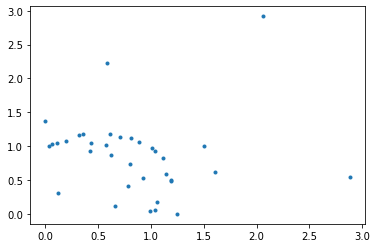

In [3]:
fig, ax = plt.subplots()
ax.plot(results['inputs'][:, 0], results['inputs'][:, 1], '.')

plt.show()